In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedrug_df = pd.read_csv(mouse_drug_data_to_load)
clinicaltrial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(clinicaltrial_df, mousedrug_df, how="left", on='Mouse ID')

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data = combined_df.groupby(["Drug","Timepoint"])

tumor_value_avg = grouped_data["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumoravg_df = pd.DataFrame(tumor_value_avg)

# Preview DataFrame
tumoravg_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_value_sem = grouped_data["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumorsem_df = pd.DataFrame(tumor_value_sem)

# Preview DataFrame
tumorsem_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_tumor = tumoravg_df.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
reformatted_tumor_sem = tumorsem_df.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")

# Preview that Reformatting worked
reformatted_tumor.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


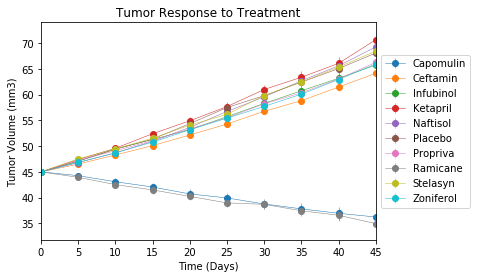

In [5]:
# Generate the Plot (with Error Bars)
reformatted_tumor.plot(kind="line", marker="o", title="Tumor Response to Treatment", yerr=reformatted_tumor_sem, linewidth=0.5)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)") 
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

# Save the Figure
plt.savefig("../Images/treatment.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_value_avg = grouped_data["Metastatic Sites"].mean()

# Convert to DataFrame
metaavg_df = pd.DataFrame(meta_value_avg)

# Preview DataFrame
metaavg_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_value_sem = grouped_data["Metastatic Sites"].sem()
# Convert to DataFrame
metasem_df = pd.DataFrame(meta_value_sem)
# Preview DataFrame
metasem_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_meta = metaavg_df.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")
reformatted_meta_sem = metasem_df.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")

# Preview that Reformatting worked
reformatted_meta.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


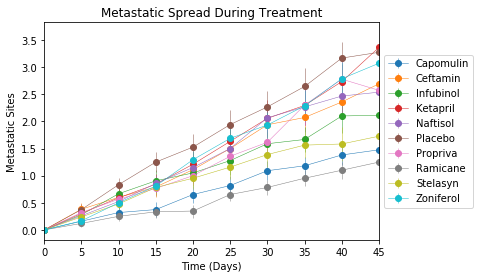

In [9]:
# Generate the Plot (with Error Bars)
reformatted_meta.plot(kind="line", marker="o", title="Metastatic Spread During Treatment", yerr=reformatted_meta_sem, linewidth=0.5)
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites") 
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

# Save the Figure
plt.savefig("../Images/metastatic_spread.png")

# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = grouped_data["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)
mouse_count_df.rename(columns={"Mouse ID":"Mouse Count"}, inplace=True)

# Preview DataFrame
mouse_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [11]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_mouse = mouse_count_df.pivot_table("Mouse Count", ["Timepoint"], "Drug")

# Preview the Data Frame
reformatted_mouse.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


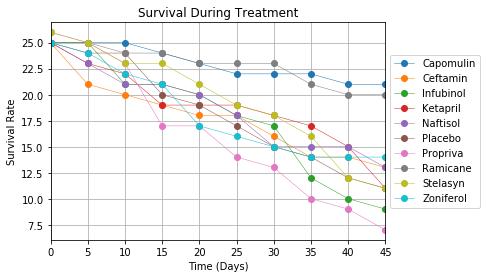

In [12]:
# Generate the Plot (Accounting for percentages)
reformatted_mouse.plot(kind="line", marker="o", title="Survival During Treatment", linewidth=0.5)
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate") 
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.grid()

# Save the Figure
plt.savefig("../Images/Treament_Survival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug

capomulin_opening = tumoravg_df.loc[("Capomulin", 0), "Tumor Volume (mm3)"]
capomulin_ending = tumoravg_df.loc[("Capomulin", 45), "Tumor Volume (mm3)"]
capomulin_percent = ((capomulin_ending - capomulin_opening) / capomulin_opening) * 100

ceftamin_opening = tumoravg_df.loc[("Ceftamin", 0), "Tumor Volume (mm3)"]
ceftamin_ending = tumoravg_df.loc[("Ceftamin", 45), "Tumor Volume (mm3)"]
ceftamin_percent = ((ceftamin_ending - ceftamin_opening) / ceftamin_opening) * 100

infubinol_opening = tumoravg_df.loc[("Infubinol", 0), "Tumor Volume (mm3)"]
infubinol_ending = tumoravg_df.loc[("Infubinol", 45), "Tumor Volume (mm3)"]
infubinol_percent = ((infubinol_ending - infubinol_opening) / infubinol_opening) * 100

ketapril_opening = tumoravg_df.loc[("Ketapril", 0), "Tumor Volume (mm3)"]
ketapril_ending = tumoravg_df.loc[("Ketapril", 45), "Tumor Volume (mm3)"]
ketapril_percent = ((ketapril_ending - ketapril_opening) / ketapril_opening) * 100

naftisol_opening = tumoravg_df.loc[("Naftisol", 0), "Tumor Volume (mm3)"]
naftisol_ending = tumoravg_df.loc[("Naftisol", 45), "Tumor Volume (mm3)"]
naftisol_percent = ((naftisol_ending - naftisol_opening) / naftisol_opening) * 100

placebo_opening = tumoravg_df.loc[("Placebo", 0), "Tumor Volume (mm3)"]
placebo_ending = tumoravg_df.loc[("Placebo", 45), "Tumor Volume (mm3)"]
placebo_percent = ((placebo_ending - placebo_opening) / placebo_opening) * 100

propriva_opening = tumoravg_df.loc[("Propriva", 0), "Tumor Volume (mm3)"]
propriva_ending = tumoravg_df.loc[("Propriva", 45), "Tumor Volume (mm3)"]
propriva_percent = ((propriva_ending - propriva_opening) / propriva_opening) * 100

ramicane_opening = tumoravg_df.loc[("Ramicane", 0), "Tumor Volume (mm3)"]
ramicane_ending = tumoravg_df.loc[("Ramicane", 45), "Tumor Volume (mm3)"]
ramicane_percent = ((ramicane_ending - ramicane_opening) / ramicane_opening) * 100

stelasyn_opening = tumoravg_df.loc[("Stelasyn", 0), "Tumor Volume (mm3)"]
stelasyn_ending = tumoravg_df.loc[("Stelasyn", 45), "Tumor Volume (mm3)"]
stelasyn_percent = ((stelasyn_ending - stelasyn_opening) / stelasyn_opening) * 100

zoniferol_opening = tumoravg_df.loc[("Zoniferol", 0), "Tumor Volume (mm3)"]
zoniferol_ending = tumoravg_df.loc[("Zoniferol", 45), "Tumor Volume (mm3)"]
zoniferol_percent = ((zoniferol_ending - zoniferol_opening) / zoniferol_opening) * 100

# Display the data to confirm
Drug_Tuple = (capomulin_percent, ketapril_percent, naftisol_percent, infubinol_percent, stelasyn_percent,   
              ramicane_percent, propriva_percent, zoniferol_percent, placebo_percent, ceftamin_percent)
Drug_Tuple


(-19.475302667894173,
 57.028794686606076,
 53.92334713476923,
 46.12347172785184,
 52.08513428789896,
 -22.320900462766673,
 47.24117486320634,
 46.57975086509525,
 51.29796048315153,
 42.516491855897414)

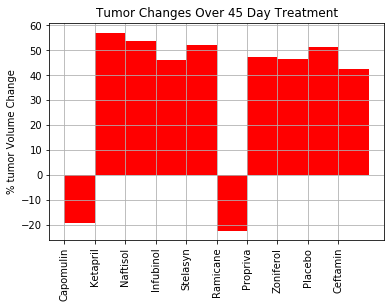

In [14]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
    
# Orient widths. Add labels, tick marks, etc. 
x_axis = combined_df["Drug"].unique()

plt.grid()
plt.bar(x_axis, Drug_Tuple, color='r', alpha=1, align="edge", width=1)

plt.title("Tumor Changes Over 45 Day Treatment")
plt.ylabel("% tumor Volume Change")
plt.xticks(rotation="vertical")

plt.show()


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()